reference notebook-
https://www.kaggle.com/code/rprkh15/predicting-faang-stocks-bi-lstms-arima-prophet#Scraping-the-Data

In [1]:
!pip install yfinance==0.1.70
!pip install yahoo-fin==0.8.9.1
!pip install mplfinance
!pip install pmdarima
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.18
    Uninstalling yfinance-0.2.18:
      Successfully uninstalled yfinance-0.2.18
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=38a6280525734797456643e7c4269e24fecea629b04af1ce5161d07ad32bd2eb
  Stored in directory: /root/.cache/pip/wheels/25/42

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# we will make use of yfinance and yahoo-fin that provide APIs that make web scraping extremely easy and convenient

In [4]:
import yfinance as yf
from yahoo_fin import stock_info

tickers = stock_info.tickers_sp500()
dataframe_names = [ticker for ticker in tickers]
print('Web scraper starting.....')
for i in range(len(tickers)):
  historical_stock_prices = (yf.Ticker(tickers[i])).history(period = 'max')
  historical_stock_prices.to_csv(dataframe_names[i] + '.csv')

# taking a look at the scraped data
pd.read_csv('GOOG.csv').head(10)

Web scraper starting.....


Date      Open      High       Low     Close     Volume  Dividends  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216          0   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639  458857488          0   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787  366857939          0   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960  306396159          0   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104  184645512          0   
5  2004-08-26  2.613952  2.688672  2.606729  2.687676  142572401          0   
6  2004-08-27  2.692408  2.705360  2.632383  2.643840  124826132          0   
7  2004-08-30  2.622171  2.627402  2.540727  2.540727  104429967          0   
8  2004-08-31  2.547950  2.583068  2.544463  2.549693   98825037          0   
9  2004-09-01  2.557912  2.564637  2.482445  2.496891  183633734          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  
6           0.0  
7           0.0  
8           0.0  
9           0.0

In [5]:
#Exploratory Data Analysis (EDA)


df_meta = pd.read_csv('META.csv')
df_aapl = pd.read_csv('AAPL.csv')
df_amzn = pd.read_csv('AMZN.csv')
df_nflx = pd.read_csv('NFLX.csv')
df_goog = pd.read_csv('GOOG.csv')

In [6]:
df_meta.head()

Date       Open       High        Low      Close     Volume  \
0  2012-05-18  42.049999  45.000000  38.000000  38.230000  573576400   
1  2012-05-21  36.529999  36.660000  33.000000  34.029999  168192700   
2  2012-05-22  32.610001  33.590000  30.940001  31.000000  101786600   
3  2012-05-23  31.370001  32.500000  31.360001  32.000000   73600000   
4  2012-05-24  32.950001  33.209999  31.770000  33.029999   50237200   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0

In [7]:
from dateutil.parser import parse   #used to parse date and time strings that may be in various formats and convert them into a standardized datetime format
df_meta['Date'] = df_meta.Date.apply(parse)
df_aapl['Date'] = df_aapl.Date.apply(parse)
df_amzn['Date'] = df_amzn.Date.apply(parse)
df_nflx['Date'] = df_nflx.Date.apply(parse)
df_goog['Date'] = df_goog.Date.apply(parse)

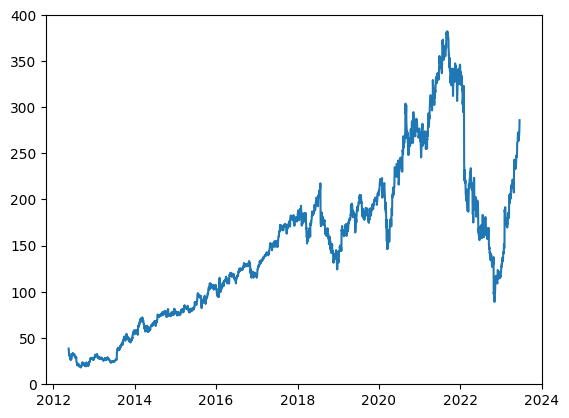

In [8]:
plt.plot(df_meta['Date'], df_meta['Close'])

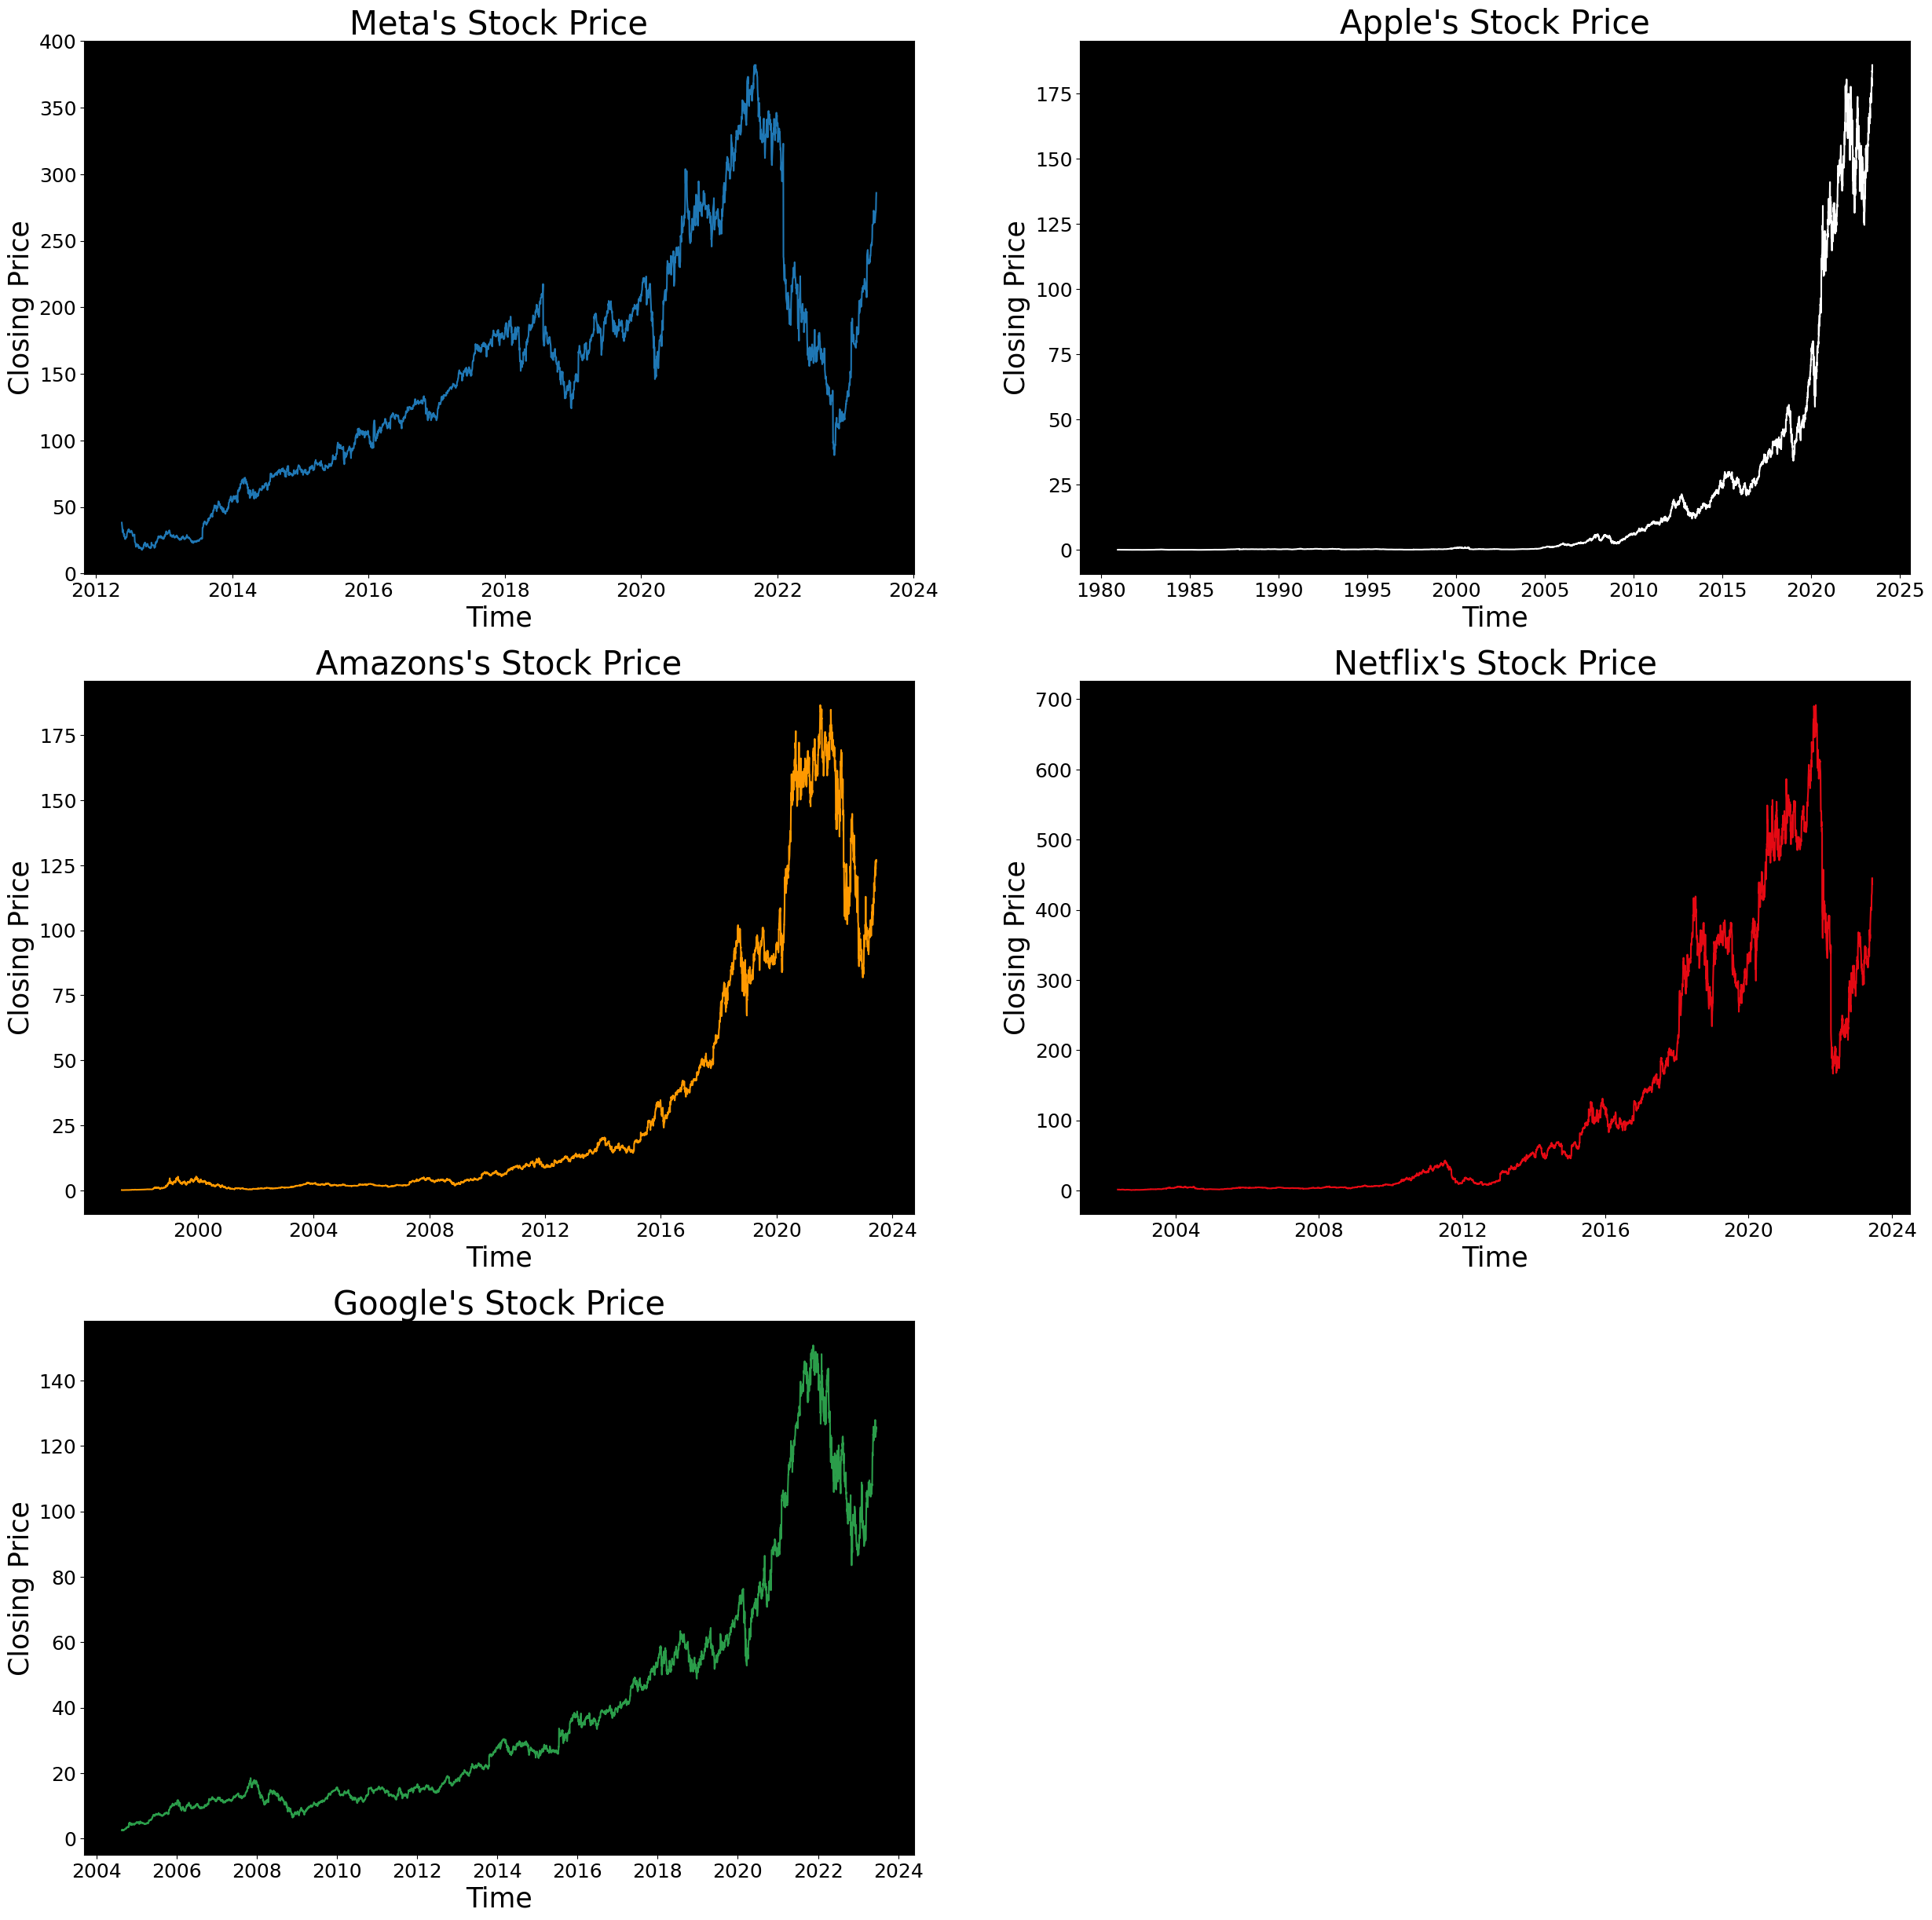

In [9]:
#visualization
def visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog):

    fig, axes = plt.subplots(3, 2, figsize = (30, 30))
    axes[2][1].set_visible(False)

    axes[0][0].set_facecolor('black')
    axes[0][0].plot(df_meta['Date'], df_meta['Close'])
    axes[0][0].set_title("Meta's Stock Price", fontsize = 30)
    axes[0][0].set_xlabel('Time', fontsize = 25)
    axes[0][0].set_ylabel('Closing Price', fontsize = 25)
    axes[0][0].xaxis.set_tick_params(labelsize = 18)
    axes[0][0].yaxis.set_tick_params(labelsize = 18)

    axes[0][1].set_facecolor('black')
    axes[0][1].plot(df_aapl['Date'], df_aapl['Close'], color = 'white')
    axes[0][1].set_title("Apple's Stock Price", fontsize = 30)
    axes[0][1].set_xlabel('Time', fontsize = 25)
    axes[0][1].set_ylabel('Closing Price', fontsize = 25)
    axes[0][1].xaxis.set_tick_params(labelsize = 18)
    axes[0][1].yaxis.set_tick_params(labelsize = 18)

    axes[1][0].set_facecolor('black')
    axes[1][0].plot(df_amzn['Date'], df_amzn['Close'], color = '#FF9900')
    axes[1][0].set_title("Amazons's Stock Price", fontsize = 30)
    axes[1][0].set_xlabel('Time', fontsize = 25)
    axes[1][0].set_ylabel('Closing Price', fontsize = 25)
    axes[1][0].xaxis.set_tick_params(labelsize = 18)
    axes[1][0].yaxis.set_tick_params(labelsize = 18)

    axes[1][1].set_facecolor('black')
    axes[1][1].plot(df_nflx['Date'], df_nflx['Close'], color = '#E50913')
    axes[1][1].set_title("Netflix's Stock Price", fontsize = 30)
    axes[1][1].set_xlabel('Time', fontsize = 25)
    axes[1][1].set_ylabel('Closing Price', fontsize = 25)
    axes[1][1].xaxis.set_tick_params(labelsize = 18)
    axes[1][1].yaxis.set_tick_params(labelsize = 18)

    axes[2][0].set_facecolor('black')
    axes[2][0].plot(df_goog['Date'], df_goog['Close'], color = '#2B9D4A')
    axes[2][0].set_title("Google's Stock Price", fontsize = 30)
    axes[2][0].set_xlabel('Time', fontsize = 25)
    axes[2][0].set_ylabel('Closing Price', fontsize = 25)
    axes[2][0].xaxis.set_tick_params(labelsize = 18)
    axes[2][0].yaxis.set_tick_params(labelsize = 18)

    plt.show()

visualize_faang_stock_prices(df_meta, df_aapl, df_amzn, df_nflx, df_goog)

We will be considering the Date, Open, High, Low, Close and Volume columns of the dataset while performing our analysis.

Predictions Using ARIMA

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# Predictions Using ARIMA


ADF Test

In [11]:
#chart_data = ['Date', 'Open', 'High', 'Low', 'Close']

new_meta_df = df_meta[chart_data]
new_aapl_df = df_aapl[chart_data]
new_amzn_df = df_amzn[chart_data]
new_nflx_df = df_nflx[chart_data]
new_goog_df = df_goog[chart_data]

def adf_test(dataframe, company):
    result = adfuller(dataframe['Close'])
    print('=========For {}========='.format(company))
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

adf_test(new_meta_df, 'Meta')
adf_test(new_aapl_df, 'Apple')
adf_test(new_amzn_df, 'Amazon')
adf_test(new_nflx_df, 'Netflix')
adf_test(new_goog_df ,'Google')

=========For Meta=========
ADF Statistic: -1.2729218280603076
p-value: 0.6414677873866811
=========For Apple=========
ADF Statistic: 4.070975660978651
p-value: 1.0
=========For Amazon=========
ADF Statistic: -0.024872776140479915
p-value: 0.9564261483468314
=========For Netflix=========
ADF Statistic: -0.7499769385143501
p-value: 0.8333763810371412
=========For Google=========
ADF Statistic: 0.766587106350713
p-value: 0.9910772211355345


In [12]:
#We need to find the order of differencing for all the companies since their p-value is greater than 0.05.
import pmdarima as pm
from pmdarima.arima.utils import ndiffs          #Perform a test of stationarity for different levels of d to estimate the number of differences required to make a given time series stationary.

def get_degree_of_differencing(dataframe, company):
    company_ndiffs = ndiffs(dataframe['Close'], test = 'adf')
    print(f'The degree of differencing is {company_ndiffs} for {company}')
    return company_ndiffs

meta_dd = get_degree_of_differencing(new_meta_df, 'Meta')
aapl_dd = get_degree_of_differencing(new_aapl_df, 'Apple')
amzn_dd = get_degree_of_differencing(new_amzn_df, 'Amazon')
nflx_dd = get_degree_of_differencing(new_nflx_df, 'Netflix')
goog_dd = get_degree_of_differencing(new_goog_df ,'Google')

The degree of differencing is 1 for Meta
The degree of differencing is 1 for Apple
The degree of differencing is 1 for Amazon
The degree of differencing is 1 for Netflix
The degree of differencing is 1 for Google


In [13]:
#Auto Arima

def arima_split(dataframe, company):
    size = int(len(dataframe) * 0.95)
    train = (dataframe['Close'])[:size]
    test = (dataframe['Close'])[size:]

    print('=========For {}========='.format(company))
    print('Train Size: {}, Test Size: {}'.format(len(train), len(test)))

    return train, test

meta_train, meta_test = arima_split(new_meta_df, 'Meta')
aapl_train, aapl_test = arima_split(new_aapl_df, 'Apple')
amzn_train, amzn_test = arima_split(new_amzn_df, 'Amazon')
nflx_train, nflx_test = arima_split(new_nflx_df, 'Netflix')
goog_train, goog_test = arima_split(new_goog_df, 'Google')

=========For Meta=========
Train Size: 2648, Test Size: 140
=========For Apple=========
Train Size: 10182, Test Size: 536
=========For Amazon=========
Train Size: 6237, Test Size: 329
=========For Netflix=========
Train Size: 5038, Test Size: 266
=========For Google=========
Train Size: 4503, Test Size: 237


In [14]:
def find_best_fit_arima(data, company):
    print('=========For {}========='.format(company))

    model = pm.auto_arima(data, test = 'adf',
                          start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3,
                          d = None, seasonal = True,
                          start_P = 0, m = 3,
                          trace = True, error_action = 'ignore',
                          suppress_warnings = True, stepwise = True,
                          D = 1, information_criterion = 'aic')

    print(model.summary())
    print('\n')

    return model

meta_arima_model = find_best_fit_arima(meta_train, 'Meta')
aapl_arima_model = find_best_fit_arima(aapl_train, 'Apple')
amzn_arima_model = find_best_fit_arima(amzn_train, 'Amazon')
nflx_arima_model = find_best_fit_arima(nflx_train, 'Netflix')
goog_arima_model = find_best_fit_arima(goog_train, 'Google')

=========For Meta=========
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=7.05 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=17831.982, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=15887.135, Time=1.17 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=16680.652, Time=1.27 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=17830.386, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=16499.959, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=15550.932, Time=2.32 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=12.08 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=5.92 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=17798.200, Time=1.80 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=15541.593, Time=4.84 sec
 ARIMA(2,0,0)(1,1,0)[3] intercept   : AIC=15864.739, Time=1.53 sec
 ARIMA(2,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=12.99 sec
 ARIMA(2,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(2,0,1)(2,1,0

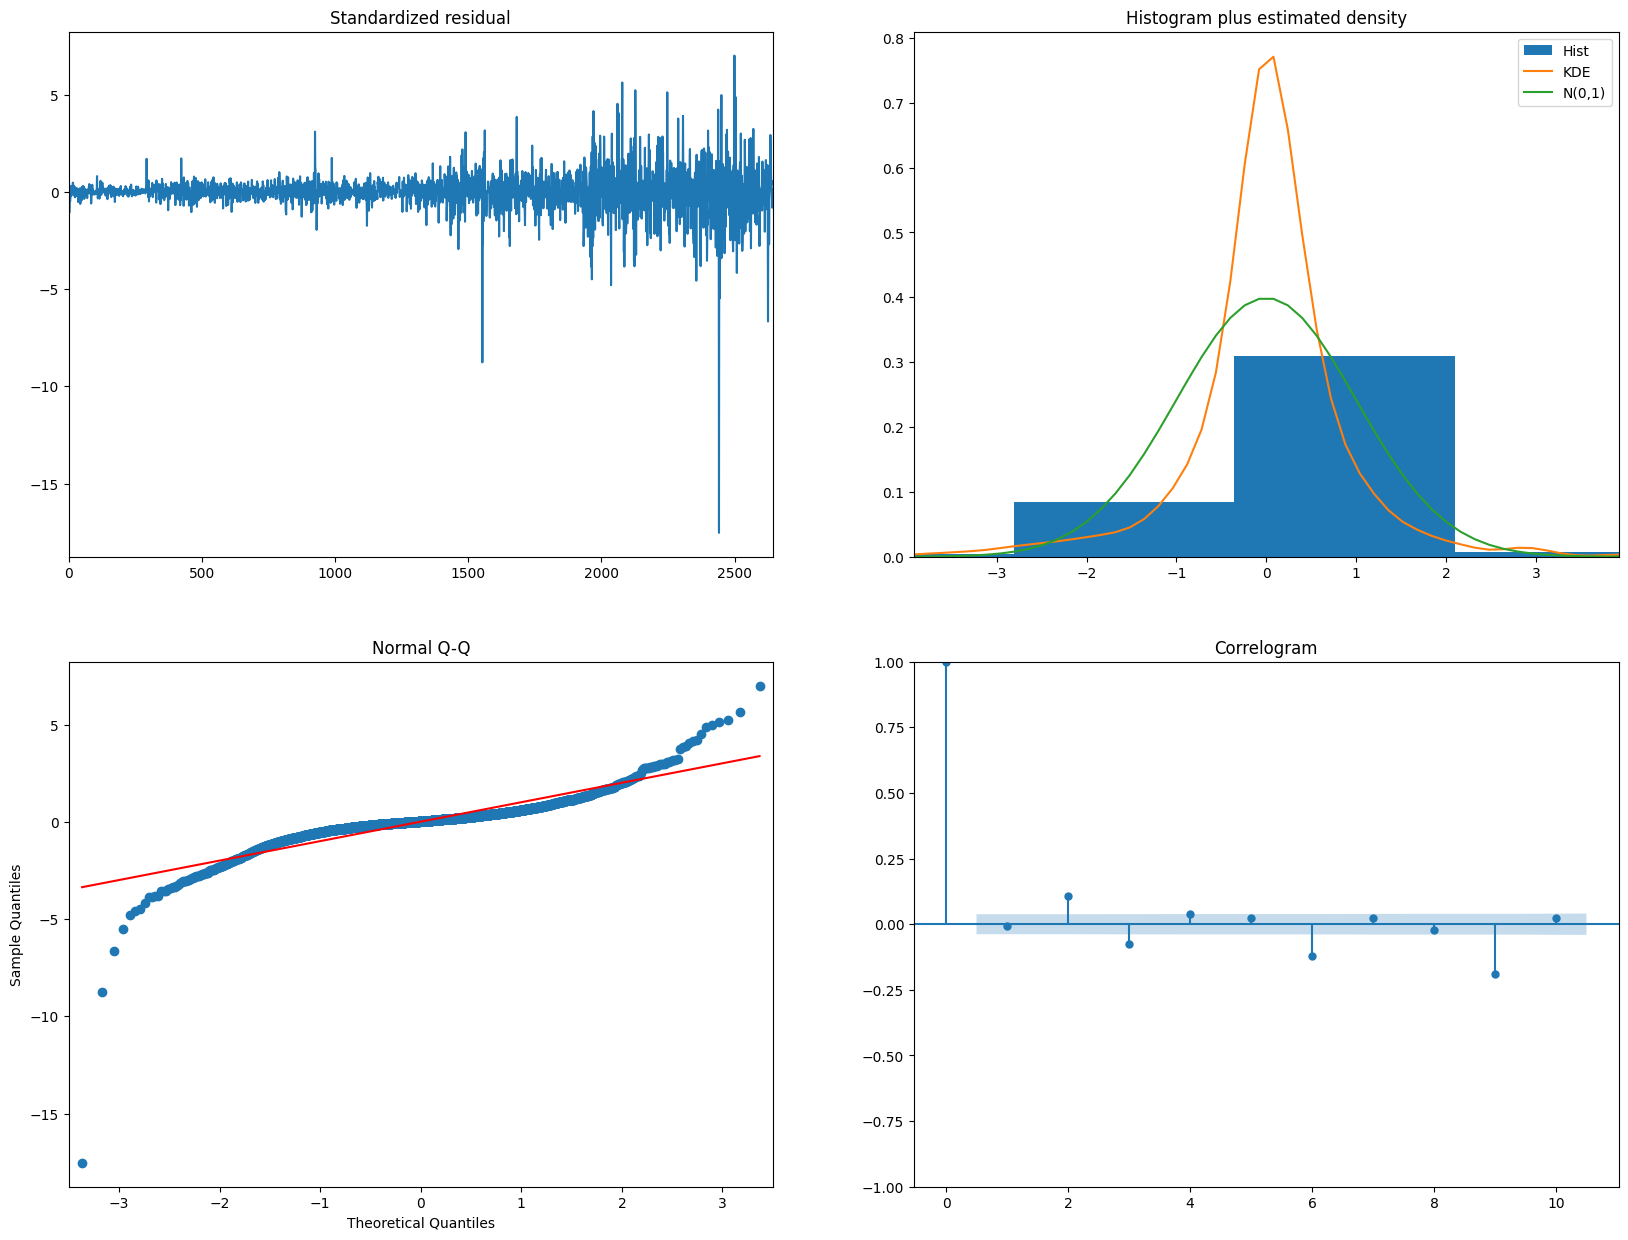

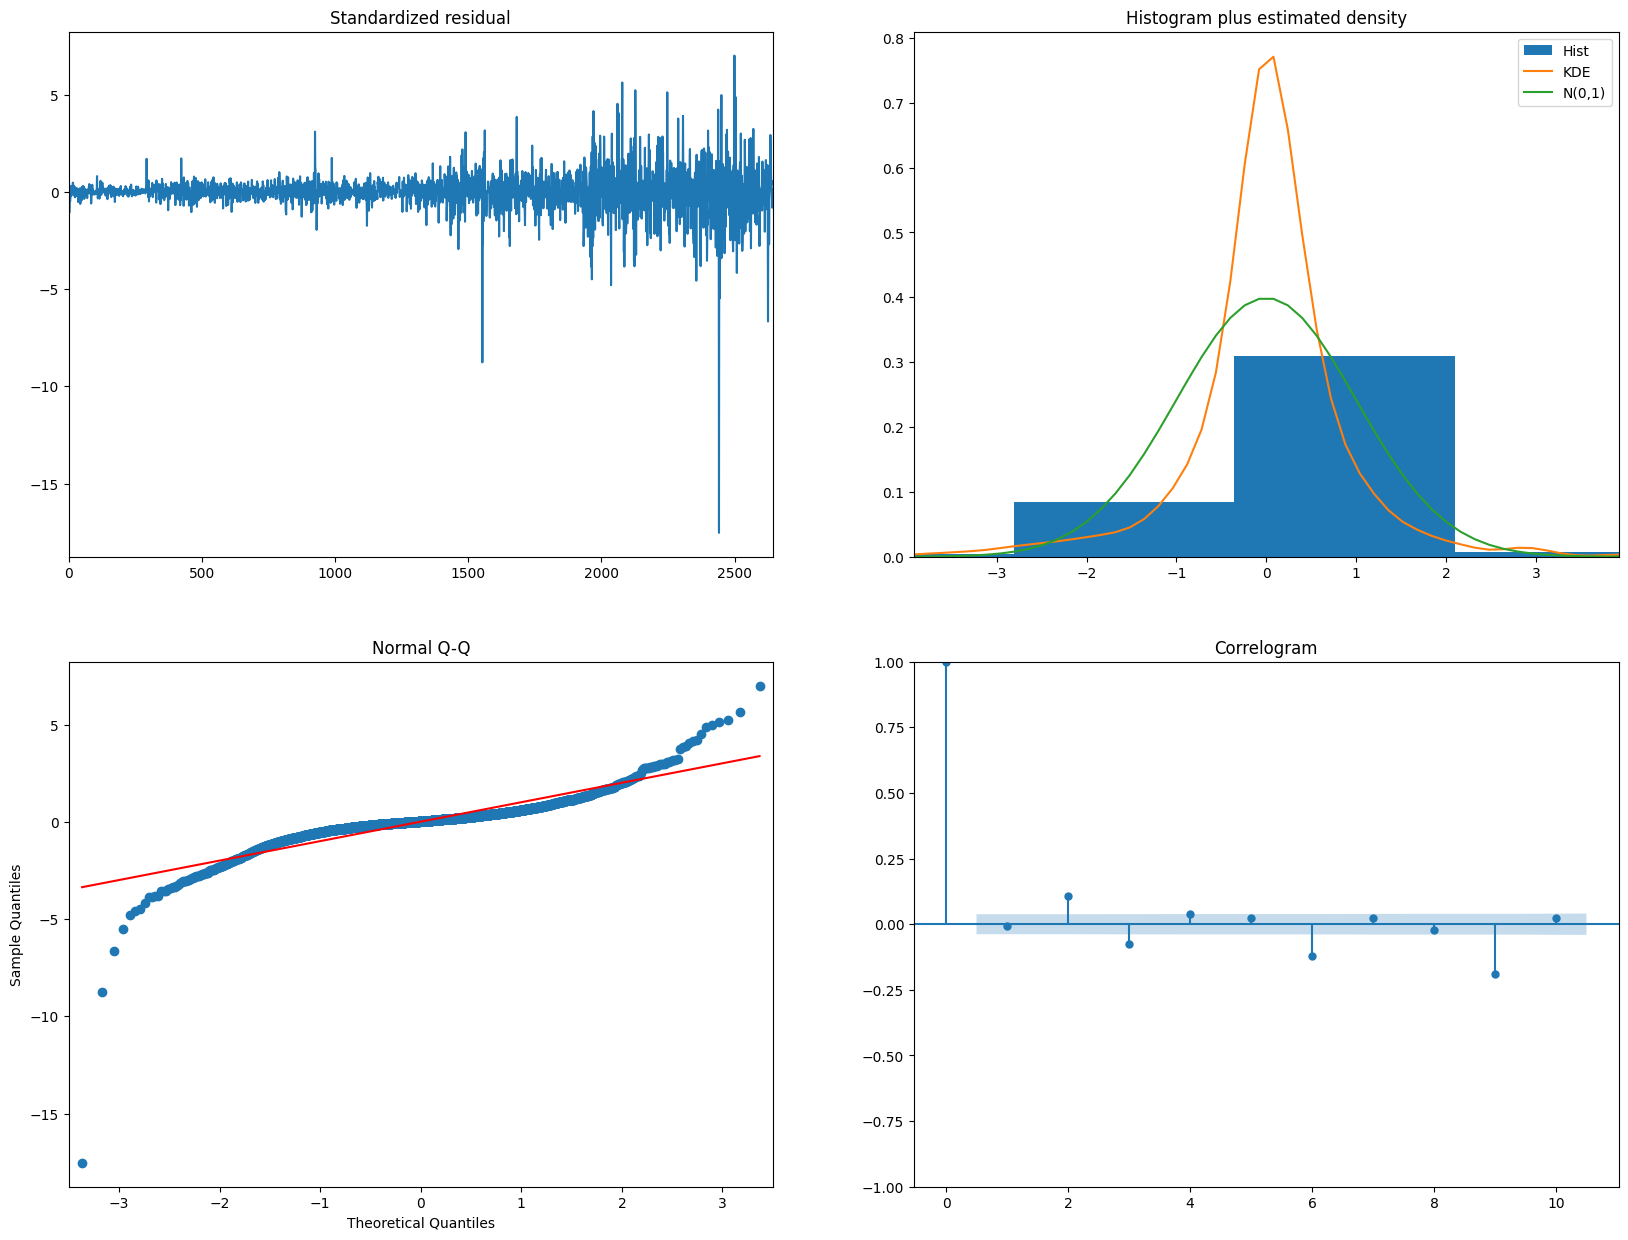

In [15]:
meta_arima_model.plot_diagnostics(figsize = (20, 15))

In [17]:
def check_model_params(model, company):
    print('The best parameters for {} are {}'.format(company, model))
    print('==================')

check_model_params(meta_arima_model, 'Meta')
check_model_params(aapl_arima_model, 'Apple')
check_model_params(amzn_arima_model, 'Amazon')
check_model_params(nflx_arima_model, 'Netflix')
check_model_params(goog_arima_model, 'Google')

The best parameters for Meta are  ARIMA(2,0,0)(2,1,0)[3]          
The best parameters for Apple are  ARIMA(1,0,1)(2,1,1)[3] intercept
The best parameters for Amazon are  ARIMA(2,0,0)(2,1,1)[3] intercept
The best parameters for Netflix are  ARIMA(2,0,1)(2,1,0)[3]          
The best parameters for Google are  ARIMA(2,0,0)(2,1,0)[3] intercept


In [18]:
meta_arima_model

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 3),
      suppress_warnings=True, with_intercept=False)

In [19]:
def make_predictions_and_print_rmse(model, test_data, company):
    print('=========For {}========='.format(company))

    forecast, confidence_interval = model.predict(X = test_data, n_periods = len(test_data), return_conf_int = True)
    forecast = pd.Series(forecast, index = test_data[:len(test_data)].index)
    lower = pd.Series(confidence_interval[:, 0], index = test_data[:len(test_data)].index)
    upper = pd.Series(confidence_interval[:, 1], index = test_data[:len(test_data)].index)

    rmse = np.sqrt(np.mean((forecast - test_data) ** 2))

    print('The RMSE is {}'.format(rmse))

    return forecast, lower, upper

forecast_meta, lower_meta, upper_meta = make_predictions_and_print_rmse(meta_arima_model, meta_test, 'Meta')
forecast_aapl, lower_aapl, upper_aapl = make_predictions_and_print_rmse(aapl_arima_model, aapl_test, 'Apple')
forecast_amzn, lower_amzn, upper_amzn = make_predictions_and_print_rmse(amzn_arima_model, amzn_test, 'Amazon')
forecast_nflx, lower_nflx, upper_nflx = make_predictions_and_print_rmse(nflx_arima_model, nflx_test, 'Netflix')
forecast_goog, lower_goog, upper_goog = make_predictions_and_print_rmse(goog_arima_model, goog_test, 'Google')

=========For Meta=========
The RMSE is 91.63019595870028
=========For Apple=========
The RMSE is 18.79060610206561
=========For Amazon=========
The RMSE is 44.480160518998794
=========For Netflix=========
The RMSE is 115.46831111114172
=========For Google=========
The RMSE is 20.482806099690084


In [20]:
def create_df_for_plotting(dataframe, forecast, lower, upper):
    data = {'Date': (dataframe['Date'])[int(len(dataframe) * 0.95):],
            'Predictions': forecast,
            'Lower_conf': lower,
            'Upper_conf': upper}

    plot_df = pd.DataFrame(data)

    return plot_df

meta_plot_df = create_df_for_plotting(new_meta_df, forecast_meta, lower_meta, upper_meta)
aapl_plot_df = create_df_for_plotting(new_aapl_df, forecast_aapl, lower_aapl, upper_aapl)
amzn_plot_df = create_df_for_plotting(new_amzn_df, forecast_amzn, lower_amzn, upper_amzn)
nflx_plot_df = create_df_for_plotting(new_nflx_df, forecast_nflx, lower_nflx, upper_nflx)
goog_plot_df = create_df_for_plotting(new_goog_df, forecast_goog, lower_goog, upper_goog)

meta_plot_df.head()

Date  Predictions  Lower_conf  Upper_conf
2648 2022-11-25   110.692712  101.764126  119.621299
2649 2022-11-28   111.311992   99.379813  123.244171
2650 2022-11-29   113.001487   99.445899  126.557075
2651 2022-11-30   110.603837   94.820635  126.387039
2652 2022-12-01   110.813775   93.649499  127.978050

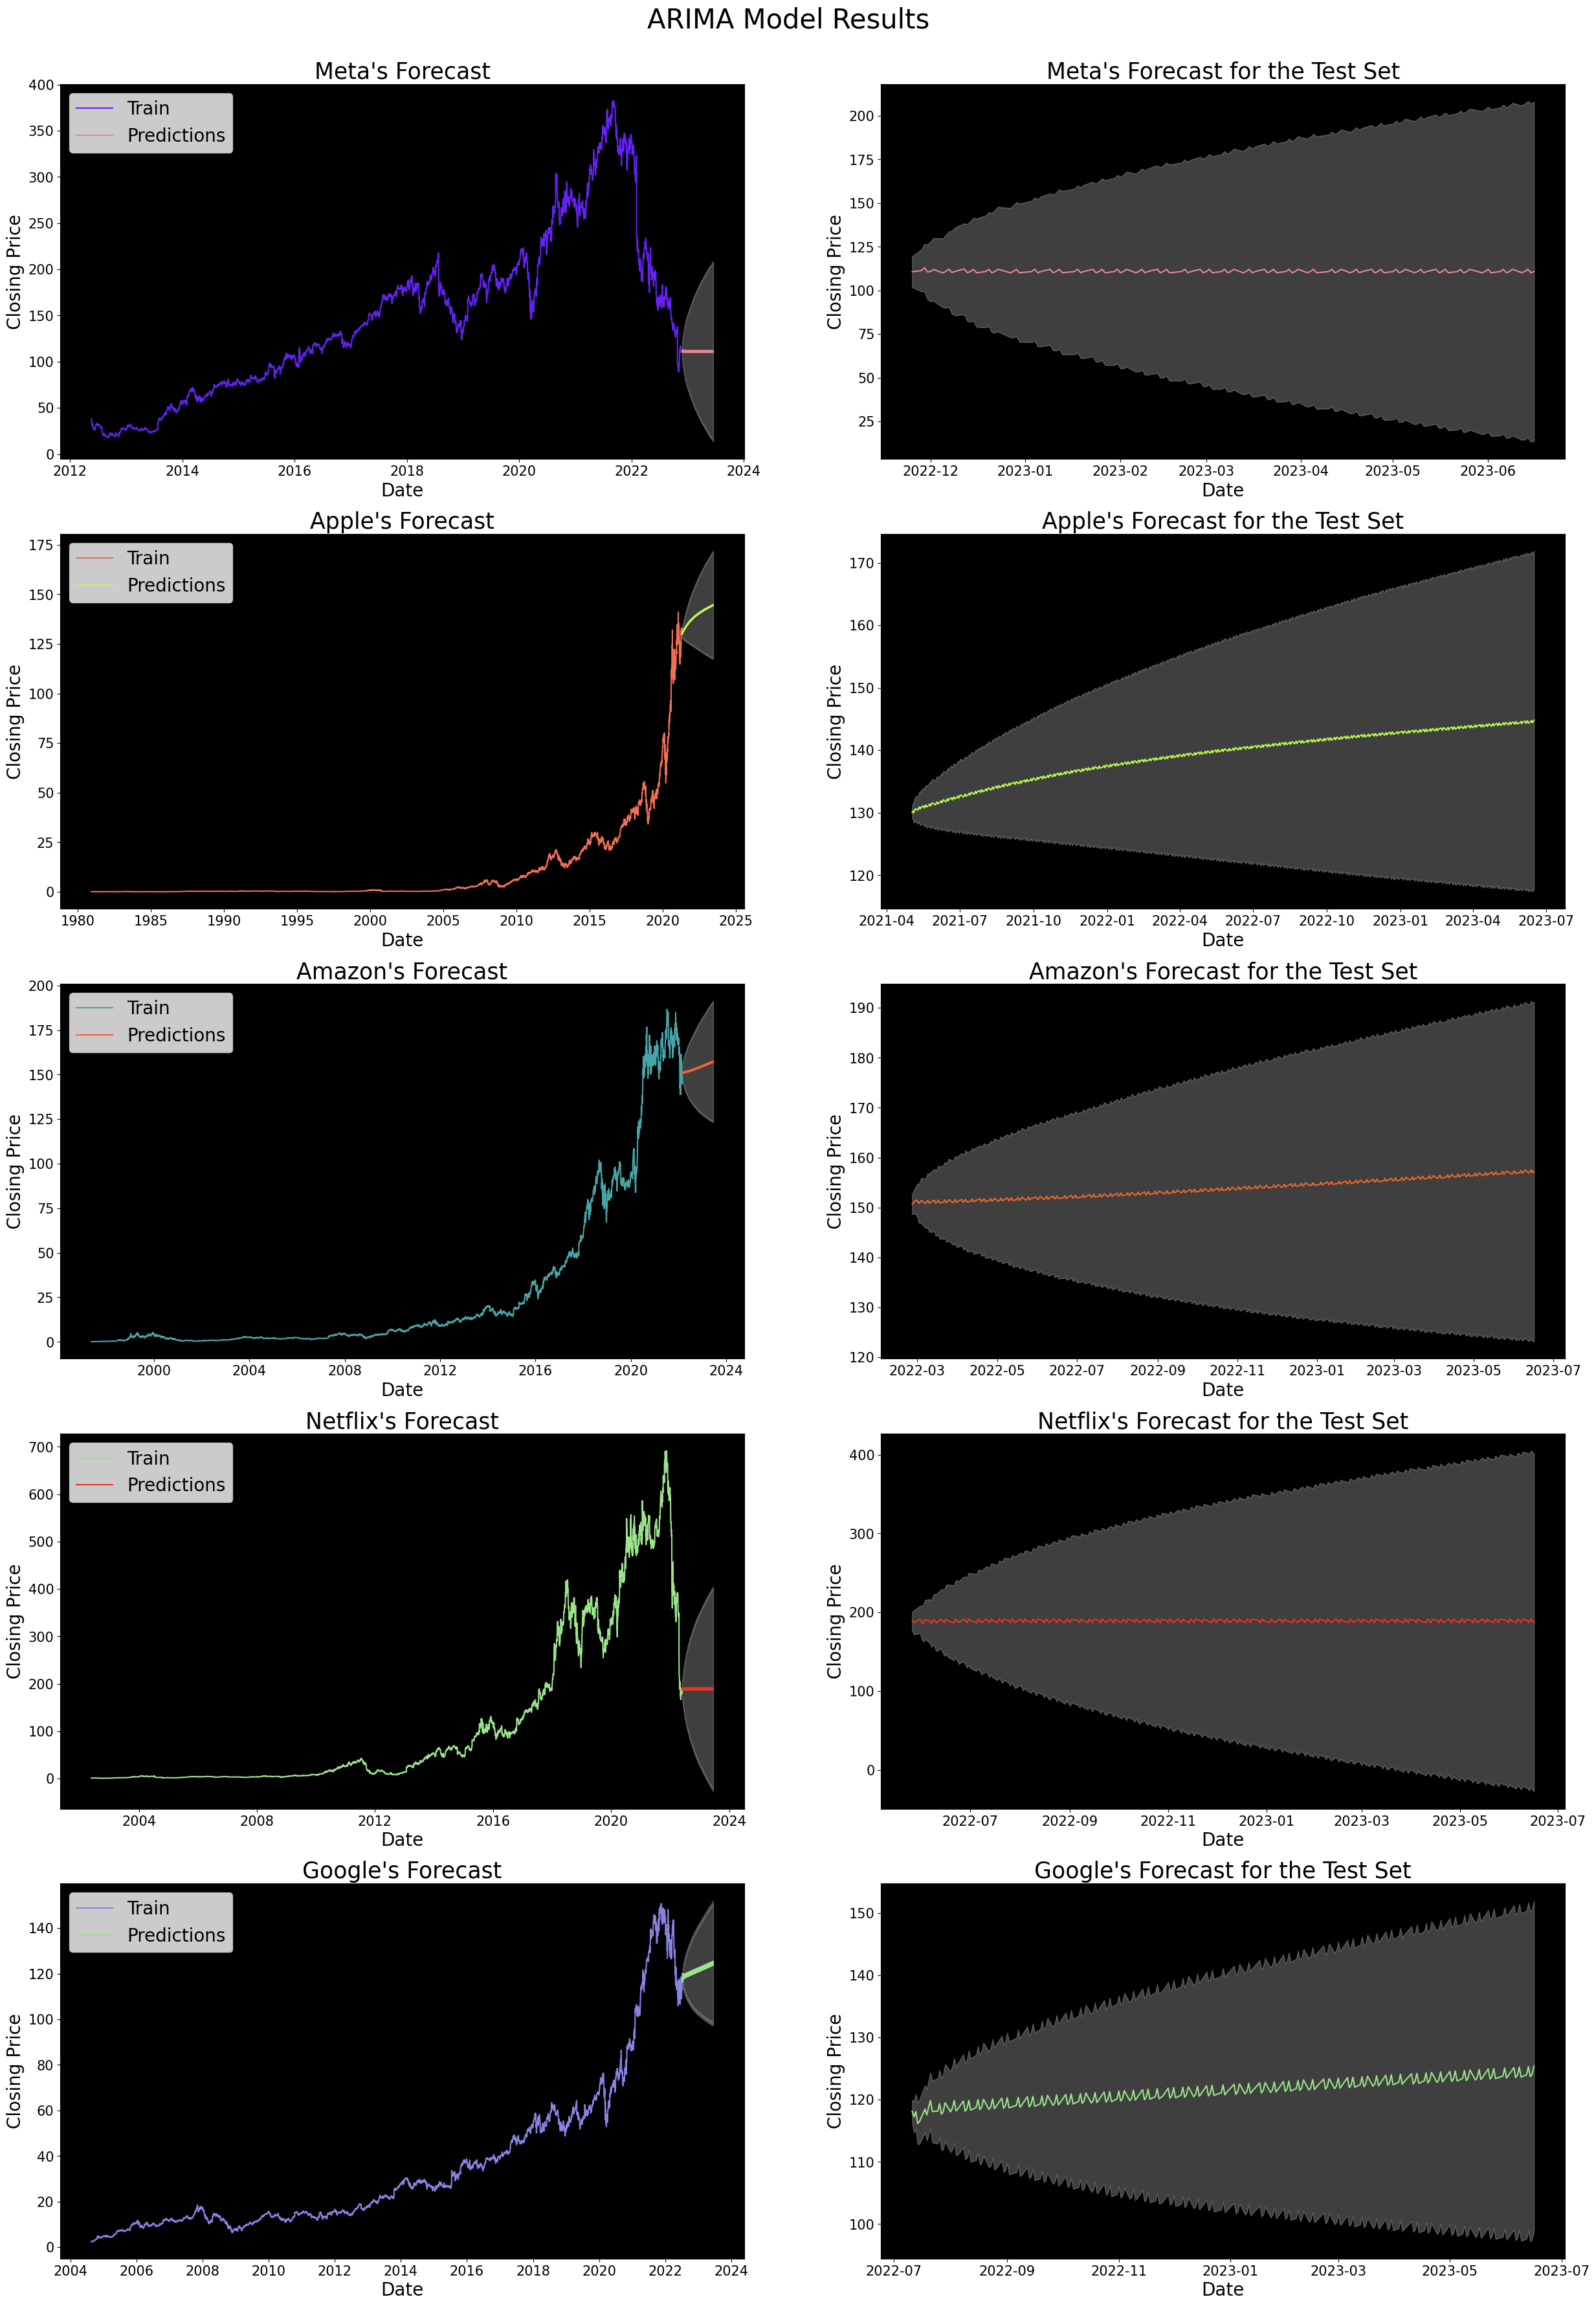

In [21]:
def show_arima_results(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df,
    meta_plot_df, aapl_plot_df, amzn_plot_df, nflx_plot_df, goog_plot_df):

    fig, axes = plt.subplots(5, 2, figsize = (30, 40))
    plt.suptitle('ARIMA Model Results', fontsize = 30)

    axes[0][0].set_facecolor('black')
    axes[0][0].set_title("Meta's Forecast", fontsize = 25)
    axes[0][0].plot((new_meta_df['Date'])[:int(len(new_meta_df) * 0.95)], meta_train, color = '#6522F5', label = 'Train')
    axes[0][0].plot((new_meta_df['Date'])[int(len(new_meta_df) * 0.95):], meta_plot_df['Predictions'], color = '#EB8791', label = 'Predictions')
    axes[0][0].fill_between(meta_plot_df['Date'].values,
                     meta_plot_df['Lower_conf'],
                     meta_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[0][0].set_xlabel('Date', fontsize = 20)
    axes[0][0].set_ylabel('Closing Price', fontsize = 20)
    axes[0][0].xaxis.set_tick_params(labelsize = 15)
    axes[0][0].yaxis.set_tick_params(labelsize = 15)
    axes[0][0].legend(loc = 'upper left', fontsize = 20)

    axes[0][1].set_title("Meta's Forecast for the Test Set", fontsize = 25)
    axes[0][1].set_facecolor('black')
    axes[0][1].plot((new_meta_df['Date'])[int(len(new_meta_df) * 0.95):], forecast_meta, color = '#EB8791')
    axes[0][1].fill_between(meta_plot_df['Date'].values,
                     meta_plot_df['Lower_conf'],
                     meta_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[0][1].set_xlabel('Date', fontsize = 20)
    axes[0][1].set_ylabel('Closing Price', fontsize = 20)
    axes[0][1].xaxis.set_tick_params(labelsize = 15)
    axes[0][1].yaxis.set_tick_params(labelsize = 15)

    axes[1][0].set_facecolor('black')
    axes[1][0].set_title("Apple's Forecast", fontsize = 25)
    axes[1][0].plot((new_aapl_df['Date'])[:int(len(new_aapl_df) * 0.95)], aapl_train, color = '#F26E55', label = 'Train')
    axes[1][0].plot((new_aapl_df['Date'])[int(len(new_aapl_df) * 0.95):], aapl_plot_df['Predictions'], color = '#B9FB50', label = 'Predictions')
    axes[1][0].fill_between(aapl_plot_df['Date'].values,
                     aapl_plot_df['Lower_conf'],
                     aapl_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[1][0].set_xlabel('Date', fontsize = 20)
    axes[1][0].set_ylabel('Closing Price', fontsize = 20)
    axes[1][0].xaxis.set_tick_params(labelsize = 15)
    axes[1][0].yaxis.set_tick_params(labelsize = 15)
    axes[1][0].legend(loc = 'upper left', fontsize = 20)

    axes[1][1].set_title("Apple's Forecast for the Test Set", fontsize = 25)
    axes[1][1].set_facecolor('black')
    axes[1][1].plot((new_aapl_df['Date'])[int(len(new_aapl_df) * 0.95):], forecast_aapl, color = '#B9FB50')
    axes[1][1].fill_between(aapl_plot_df['Date'].values,
                     aapl_plot_df['Lower_conf'],
                     aapl_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[1][1].set_xlabel('Date', fontsize = 20)
    axes[1][1].set_ylabel('Closing Price', fontsize = 20)
    axes[1][1].xaxis.set_tick_params(labelsize = 15)
    axes[1][1].yaxis.set_tick_params(labelsize = 15)

    axes[2][0].set_facecolor('black')
    axes[2][0].set_title("Amazon's Forecast", fontsize = 25)
    axes[2][0].plot((new_amzn_df['Date'])[:int(len(new_amzn_df) * 0.95)], amzn_train, color = '#47A5A8', label = 'Train')
    axes[2][0].plot((new_amzn_df['Date'])[int(len(new_amzn_df) * 0.95):], amzn_plot_df['Predictions'], color = '#ED672C', label = 'Predictions')
    axes[2][0].fill_between(amzn_plot_df['Date'].values,
                     amzn_plot_df['Lower_conf'],
                     amzn_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[2][0].set_xlabel('Date', fontsize = 20)
    axes[2][0].set_ylabel('Closing Price', fontsize = 20)
    axes[2][0].xaxis.set_tick_params(labelsize = 15)
    axes[2][0].yaxis.set_tick_params(labelsize = 15)
    axes[2][0].legend(loc = 'upper left', fontsize = 20)

    axes[2][1].set_title("Amazon's Forecast for the Test Set", fontsize = 25)
    axes[2][1].set_facecolor('black')
    axes[2][1].plot((new_amzn_df['Date'])[int(len(new_amzn_df) * 0.95):], forecast_amzn, color = '#ED672C')
    axes[2][1].fill_between(amzn_plot_df['Date'].values,
                     amzn_plot_df['Lower_conf'],
                     amzn_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[2][1].set_xlabel('Date', fontsize = 20)
    axes[2][1].set_ylabel('Closing Price', fontsize = 20)
    axes[2][1].xaxis.set_tick_params(labelsize = 15)
    axes[2][1].yaxis.set_tick_params(labelsize = 15)

    axes[3][0].set_facecolor('black')
    axes[3][0].set_title("Netflix's Forecast", fontsize = 25)
    axes[3][0].plot((new_nflx_df['Date'])[:int(len(new_nflx_df) * 0.95)], nflx_train, color = '#9BE48B', label = 'Train')
    axes[3][0].plot((new_nflx_df['Date'])[int(len(new_nflx_df) * 0.95):], nflx_plot_df['Predictions'], color = '#EB3323', label = 'Predictions')
    axes[3][0].fill_between(nflx_plot_df['Date'].values,
                     nflx_plot_df['Lower_conf'],
                     nflx_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[3][0].set_xlabel('Date', fontsize = 20)
    axes[3][0].set_ylabel('Closing Price', fontsize = 20)
    axes[3][0].xaxis.set_tick_params(labelsize = 15)
    axes[3][0].yaxis.set_tick_params(labelsize = 15)
    axes[3][0].legend(loc = 'upper left', fontsize = 20)

    axes[3][1].set_title("Netflix's Forecast for the Test Set", fontsize = 25)
    axes[3][1].set_facecolor('black')
    axes[3][1].plot((new_nflx_df['Date'])[int(len(new_nflx_df) * 0.95):], forecast_nflx, color = '#EB3323')
    axes[3][1].fill_between(nflx_plot_df['Date'].values,
                     nflx_plot_df['Lower_conf'],
                     nflx_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[3][1].set_xlabel('Date', fontsize = 20)
    axes[3][1].set_ylabel('Closing Price', fontsize = 20)
    axes[3][1].xaxis.set_tick_params(labelsize = 15)
    axes[3][1].yaxis.set_tick_params(labelsize = 15)

    axes[4][0].set_facecolor('black')
    axes[4][0].set_title("Google's Forecast", fontsize = 25)
    axes[4][0].plot((new_goog_df['Date'])[:int(len(new_goog_df) * 0.95)], goog_train, color = '#8783E3', label = 'Train')
    axes[4][0].plot((new_goog_df['Date'])[int(len(new_goog_df) * 0.95):], goog_plot_df['Predictions'], color = '#9BE48B', label = 'Predictions')
    axes[4][0].fill_between(goog_plot_df['Date'].values,
                     goog_plot_df['Lower_conf'],
                     goog_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[4][0].set_xlabel('Date', fontsize = 20)
    axes[4][0].set_ylabel('Closing Price', fontsize = 20)
    axes[4][0].xaxis.set_tick_params(labelsize = 15)
    axes[4][0].yaxis.set_tick_params(labelsize = 15)
    axes[4][0].legend(loc = 'upper left', fontsize = 20)

    axes[4][1].set_title("Google's Forecast for the Test Set", fontsize = 25)
    axes[4][1].set_facecolor('black')
    axes[4][1].plot((new_goog_df['Date'])[int(len(new_goog_df) * 0.95):], forecast_goog, color = '#9BE48B')
    axes[4][1].fill_between(goog_plot_df['Date'].values,
                     goog_plot_df['Lower_conf'],
                     goog_plot_df['Upper_conf'],
                     color = 'w', alpha = 0.25)
    axes[4][1].set_xlabel('Date', fontsize = 20)
    axes[4][1].set_ylabel('Closing Price', fontsize = 20)
    axes[4][1].xaxis.set_tick_params(labelsize = 15)
    axes[4][1].yaxis.set_tick_params(labelsize = 15)

    plt.subplots_adjust(top = 0.95)
    plt.show()

show_arima_results(new_meta_df, new_aapl_df, new_amzn_df, new_nflx_df, new_goog_df,
                   meta_plot_df, aapl_plot_df, amzn_plot_df, nflx_plot_df, goog_plot_df)

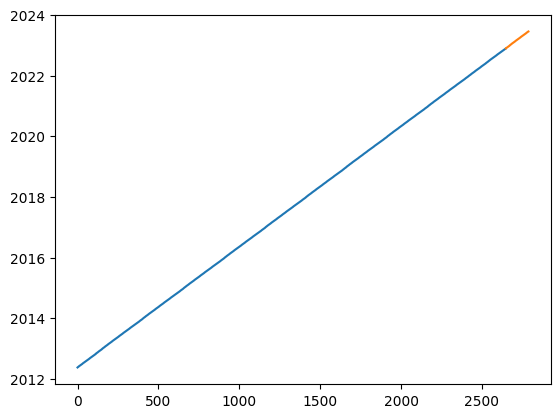

In [23]:
plt.plot((new_meta_df['Date'])[:int(len(new_meta_df) * 0.95)])
plt.plot((new_meta_df['Date'])[int(len(new_meta_df) * 0.95):])

Predictions Using Prophet

In [24]:
#The input to Prophet is always a dataframe with two columns: ds and y.
#The ds column represents the date and the y column must be numeric and should be the measurement we wish to forecast.

def prophet_formatting(dataframe):
    dataframe = dataframe[['Date', 'Close']]
    dataframe = dataframe.rename(columns = {'Date': 'ds', 'Close': 'y'})
    return dataframe

meta_prophet_df = prophet_formatting(new_meta_df)
aapl_prophet_df = prophet_formatting(new_aapl_df)
amzn_prophet_df = prophet_formatting(new_amzn_df)
nflx_prophet_df = prophet_formatting(new_nflx_df)
goog_prophet_df = prophet_formatting(new_goog_df)

meta_prophet_df.head()

ds          y
0 2012-05-18  38.230000
1 2012-05-21  34.029999
2 2012-05-22  31.000000
3 2012-05-23  32.000000
4 2012-05-24  33.029999

In [27]:
from prophet import Prophet
from prophet.plot import plot_plotly

from datetime import datetime

In [28]:
def make_predictions_with_prophet(data, company):
    print('=========For {}========='.format(company))

    size = int(len(data) * 0.95)
    train = data[:size]
    test = data[size:]

    t1 = datetime.strptime(str(test['ds'].iloc[0]), '%Y-%m-%d %H:%M:%S')
    t2 = datetime.strptime(str(test['ds'].iloc[-1]), '%Y-%m-%d %H:%M:%S')
    time = t2 - t1
    period = int(time.total_seconds() / 86400) + 1

    fbp = Prophet(yearly_seasonality = 'auto')
    fbp.fit(train)
    future = fbp.make_future_dataframe(periods = period)
    pred = fbp.predict(future)

    return fbp, train, test, pred

meta_fbp, meta_train, meta_test, meta_pred = make_predictions_with_prophet(meta_prophet_df, 'Meta')
aapl_fbp, aapl_train, aapl_test, aapl_pred = make_predictions_with_prophet(aapl_prophet_df, 'Apple')
amzn_fbp, amzn_train, amzn_test, amzn_pred = make_predictions_with_prophet(amzn_prophet_df, 'Amazon')
nflx_fbp, nflx_train, nflx_test, nflx_pred = make_predictions_with_prophet(nflx_prophet_df, 'Netflix')
goog_fbp, goog_train, goog_test, goog_pred = make_predictions_with_prophet(goog_prophet_df, 'Google')

=========For Meta=========


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/2nb81hvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/m9r2jkpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60750', 'data', 'file=/tmp/tmpik_7ph_x/2nb81hvp.json', 'init=/tmp/tmpik_7ph_x/m9r2jkpw.json', 'output', 'file=/tmp/tmpik_7ph_x/prophet_modela1x34vh8/prophet_model-20230616182420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik

=========For Apple=========


DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/lcf749y6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10903', 'data', 'file=/tmp/tmpik_7ph_x/w9knf2v0.json', 'init=/tmp/tmpik_7ph_x/lcf749y6.json', 'output', 'file=/tmp/tmpik_7ph_x/prophet_modelbfdyu3u5/prophet_model-20230616182422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/icc63vrh.json


=========For Amazon=========


DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/59m67kww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51373', 'data', 'file=/tmp/tmpik_7ph_x/icc63vrh.json', 'init=/tmp/tmpik_7ph_x/59m67kww.json', 'output', 'file=/tmp/tmpik_7ph_x/prophet_modelnyq1xvhu/prophet_model-20230616182432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/jxjzrzjt.json


=========For Netflix=========


DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/fq3td9ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73707', 'data', 'file=/tmp/tmpik_7ph_x/jxjzrzjt.json', 'init=/tmp/tmpik_7ph_x/fq3td9ty.json', 'output', 'file=/tmp/tmpik_7ph_x/prophet_modelj9oextwy/prophet_model-20230616182437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/f1wlh60z.json


=========For Google=========


DEBUG:cmdstanpy:input tempfile: /tmp/tmpik_7ph_x/hwh4vait.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75637', 'data', 'file=/tmp/tmpik_7ph_x/f1wlh60z.json', 'init=/tmp/tmpik_7ph_x/hwh4vait.json', 'output', 'file=/tmp/tmpik_7ph_x/prophet_modelu4hh1za8/prophet_model-20230616182441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:24:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:24:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
def calculate_prophet_rmse(pred, test, company):
    print('=========For {}========='.format(company))

    rmse = np.sqrt(np.mean((np.array(pred.tail(len(test))[['trend']]) - np.array(test['y'])) ** 2))

    print('The RMSE is {}'.format(rmse))

calculate_prophet_rmse(meta_pred, meta_test, 'Meta')
calculate_prophet_rmse(aapl_pred, aapl_test, 'Apple')
calculate_prophet_rmse(amzn_pred, amzn_test, 'Amazon')
calculate_prophet_rmse(nflx_pred, nflx_test, 'Netflix')
calculate_prophet_rmse(goog_pred, goog_test, 'Google')

=========For Meta=========
The RMSE is 54.17112691231925
=========For Apple=========
The RMSE is 54.99191342950815
=========For Amazon=========
The RMSE is 89.41071630153003
=========For Netflix=========
The RMSE is 295.8156706332055
=========For Google=========
The RMSE is 54.101905832992315


In [30]:
def display_prophet_predictions(model, predictions, company):

    fig = plot_plotly(model, predictions,
                      xlabel = 'Date', ylabel = 'Closing Price',
                      figsize = (900, 600))
    fig.update_layout(title = dict(
                         text = '<b>Predictions for ' + company + '</b>',
                         x = 0.5,
                         y = 0.95,
                         font = dict(
                             size = 20
                         )
                      ),
                      template = 'plotly_dark')
    fig.show()

display_prophet_predictions(meta_fbp, meta_pred, 'Meta')
display_prophet_predictions(aapl_fbp, aapl_pred, 'Apple')
display_prophet_predictions(amzn_fbp, amzn_pred, 'Amazon')
display_prophet_predictions(nflx_fbp, nflx_pred, 'Netflix')
display_prophet_predictions(goog_fbp, goog_pred, 'Google')

Predictions Using Bi-LSTMs

In [31]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

In [32]:
def retrieve_closing_prices_only(data):
    data = data[['Close']]
    return data

def min_max_scaling(data):
    scaler = MinMaxScaler(feature_range = (0, 1))
    data = scaler.fit_transform(data.values)
    return scaler, data

meta_scaler, new_meta_df = min_max_scaling(retrieve_closing_prices_only(new_meta_df))
aapl_scaler, new_aapl_df = min_max_scaling(retrieve_closing_prices_only(new_aapl_df))
amzn_scaler, new_amzn_df = min_max_scaling(retrieve_closing_prices_only(new_amzn_df))
nflx_scaler, new_nflx_df = min_max_scaling(retrieve_closing_prices_only(new_nflx_df))
goog_scaler, new_goog_df = min_max_scaling(retrieve_closing_prices_only(new_goog_df))

In [33]:
new_meta_df

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.70138568],
       [0.72465357],
       [0.7360955 ]])

In [34]:
def split_and_reshape_data(dataframe, pred_days, company):
    prediction_days = pred_days

    train_size = int(np.ceil(len(dataframe) * 0.95))
    test_size = len(dataframe) - train_size
    print(f'The training size for {company.title()} is {train_size} rows')
    print(f'The testing size for {company.title()} is {test_size} rows')

    train_data = dataframe[0: int(train_size), :]
    test_data = dataframe[train_size - prediction_days:, :]

    X_train, y_train, X_test, y_test = [], [], [], []

    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data[i - prediction_days: i, 0])
        y_train.append(train_data[i, 0])

    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data[i - prediction_days: i, 0])
        y_test.append(test_data[i, 0])

    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


    print('Data for {} split successfully'.format(company.title()))

    return X_train, y_train, X_test, y_test

X_train_meta, y_train_meta, X_test_meta, y_test_meta = split_and_reshape_data(new_meta_df, 30, 'META')
X_train_aapl, y_train_aapl, X_test_aapl, y_test_aapl = split_and_reshape_data(new_aapl_df, 30, 'APPLE')
X_train_amzn, y_train_amzn, X_test_amzn, y_test_amzn = split_and_reshape_data(new_amzn_df, 30, 'AMAZON')
X_train_nflx, y_train_nflx, X_test_nflx, y_test_nflx = split_and_reshape_data(new_nflx_df, 30, 'NETFLIX')
X_train_goog, y_train_goog, X_test_goog, y_test_goog = split_and_reshape_data(new_goog_df, 30, 'GOOGLE')

The training size for Meta is 2649 rows
The testing size for Meta is 139 rows
Data for Meta split successfully
The training size for Apple is 10183 rows
The testing size for Apple is 535 rows
Data for Apple split successfully
The training size for Amazon is 6238 rows
The testing size for Amazon is 328 rows
Data for Amazon split successfully
The training size for Netflix is 5039 rows
The testing size for Netflix is 265 rows
Data for Netflix split successfully
The training size for Google is 4503 rows
The testing size for Google is 237 rows
Data for Google split successfully


In [36]:
def create_and_train_bilstm_model(X_train, y_train, X_test, y_test, company):

    print('=========For {}========='.format(company))

    model = Sequential([
    Conv1D(32, 3, strides = 1, activation = 'relu', input_shape = [30, 1]),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(64, return_sequences = True)),
    Bidirectional(LSTM(64)),
    Dense(32, activation = 'relu'),
    Dense(1)
    ])

    model.compile(optimizer = Adam(), loss = Huber(), metrics = ['mse', 'mae'])

    predictor = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

    y_pred = model.predict(X_test)

    return model, predictor, y_pred

meta_model, meta_predictor, meta_y_pred = create_and_train_bilstm_model(X_train_meta, y_train_meta, X_test_meta, y_test_meta, 'Meta')
aapl_model, aapl_predictor, aapl_y_pred = create_and_train_bilstm_model(X_train_aapl, y_train_aapl, X_test_aapl, y_test_aapl, 'Apple')
amzn_model, amzn_predictor, amzn_y_pred = create_and_train_bilstm_model(X_train_amzn, y_train_amzn, X_test_amzn, y_test_amzn, 'Amazon')
nflx_model, nflx_predictor, nflx_y_pred = create_and_train_bilstm_model(X_train_nflx, y_train_nflx, X_test_nflx, y_test_nflx, 'Netflix')
goog_model, goog_predictor, goog_y_pred = create_and_train_bilstm_model(X_train_goog, y_train_goog, X_test_goog, y_test_goog, 'Google')

=========For Meta=========
Epoch 1/10
82/82 [==============================] - 30s 162ms/step - loss: 0.0047 - mse: 0.0094 - mae: 0.0509 - val_loss: 0.0015 - val_mse: 0.0030 - val_mae: 0.0470
Epoch 2/10
82/82 [==============================] - 10s 126ms/step - loss: 4.6224e-04 - mse: 9.2447e-04 - mae: 0.0192 - val_loss: 0.0012 - val_mse: 0.0025 - val_mae: 0.0417
Epoch 3/10
82/82 [==============================] - 10s 125ms/step - loss: 5.3679e-04 - mse: 0.0011 - mae: 0.0219 - val_loss: 8.3989e-04 - val_mse: 0.0017 - val_mae: 0.0327
Epoch 4/10
82/82 [==============================] - 9s 106ms/step - loss: 3.8703e-04 - mse: 7.7405e-04 - mae: 0.0181 - val_loss: 8.1160e-04 - val_mse: 0.0016 - val_mae: 0.0324
Epoch 5/10
82/82 [==============================] - 10s 123ms/step - loss: 3.2698e-04 - mse: 6.5396e-04 - mae: 0.0169 - val_loss: 0.0012 - val_mse: 0.0023 - val_mae: 0.0408
Epoch 6/10
82/82 [==============================] - 10s 125ms/step - loss: 2.5674e-04 - mse: 5.1348e-04 - mae: 0.

In [37]:
def predictions_inverse_scaler_rmse(company, scaler, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

    print(f'The RMSE for {company} is {rmse}')

    return y_pred, y_test

y_pred_meta, y_test_meta = predictions_inverse_scaler_rmse('Meta', meta_scaler, meta_model, X_test_meta, y_test_meta)
y_pred_aapl, y_test_aapl = predictions_inverse_scaler_rmse('Apple', aapl_scaler, aapl_model, X_test_aapl, y_test_aapl)
y_pred_amzn, y_test_amzn = predictions_inverse_scaler_rmse('Amazon', amzn_scaler, amzn_model, X_test_amzn, y_test_amzn)
y_pred_nflx, y_test_nflx = predictions_inverse_scaler_rmse('Netflix', nflx_scaler, nflx_model, X_test_nflx, y_test_nflx)
y_pred_goog, y_test_goog = predictions_inverse_scaler_rmse('Google', goog_scaler, goog_model, X_test_goog, y_test_goog)

5/5 [==============================] - 0s 62ms/step
The RMSE for Meta is 8.58942084339706
17/17 [==============================] - 1s 63ms/step
The RMSE for Apple is 7.679530582638602
11/11 [==============================] - 1s 49ms/step
The RMSE for Amazon is 6.7855617399426515
9/9 [==============================] - 1s 69ms/step
The RMSE for Netflix is 12.79762232959863
8/8 [==============================] - 0s 46ms/step
The RMSE for Google is 4.194767959382496


In [38]:
#BI lstm performs best